In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]#3,4째 특징만 반환
y=iris.target#타겟값
print(np.unique(y))

[0 1 2]


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,
                                                     random_state=0,stratify=y)

In [7]:
print('y의 레이블 카운트:',np.bincount(y))
print('y_train의 레이블 카운트:',np.bincount(y_train))#비율 66
print('y_test의 레이블 카운트:',np.bincount(y_test))#비율 33

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


특성을 표준합니다
머신러닝 알고리즘 최적화 알고리즘은 성능을 위해 특성 스케일을 조정해야합니다

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.transform(X_test)

<h2>4.사이킷런으로 퍼셉트론 훈련</h2>

In [13]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.1,random_state=1)
ppn.fit(X_train_sc,y_train)



Perceptron(eta0=0.1, random_state=1)

In [17]:
y_pred=ppn.predict(X_test_sc)#예측값을 도출한다
print((y_test != y_pred).sum())#예측값과 실제값 비교하여 갯수 반환

2


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))#예측의 정확도 반환
#혹은 
print(ppn.score(X_test_sc,y_test))

0.9555555555555556
0.9555555555555556


<h2>4.로지스틱으로 퍼셉트론 훈련</h2>

<h3>로지스틱은 구현하기 매우 쉽고 선형적으로 구분되는 클래스이다.</h3>
로지스틱의 아이디어는 오즈비에 해당합니다 공식:p/1-p p는 양성샘플로 가정
logit(p)=log(p/1-p) 로짓함수는 0과1사이의 입력을 받아 실수 범위 값으로 반환합니다
공식은 w.t*x 이고 p(y=1|x) 이함수를 뒤집이면 로지스틱함수가 됩니다
로지스틱(az)=1/1+e**-z
z=w0*x0+w1*x1+w2*x2+...+xm*wm

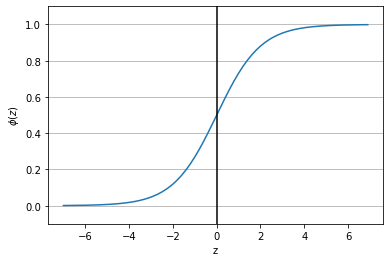

In [26]:
#시그모이드 구현
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7,0.1)
phi_z=sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0,0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
ax=plt.gca()
ax.yaxis.grid(True)
#z가 무한이면 z는 1에 가까워진다 z가 음의 방향으로 커지면 0에수렴 
#로지스틱은 활성화함수에 시그모이드 함수를 사용합니다

In [28]:
from IPython.display import Image
Image(url='https://git.io/Jtm22', width=500) 

<h3> 로지스틱 비용 함수의 가중치 학습하기 </h3>

<h4>로지스틱비용함수</h4> 
공식=y*log(zi)+(1-y)*log(1-z)
y=1 일때 y*log(z)
y=0 일때 (1-y)*log(z)

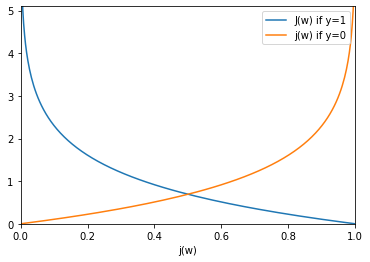

In [36]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1-sigmoid(z))
z=np.arange(-10,10,0.1)
phi_z=sigmoid(z)

c1=[cost_1(x) for x in z]
plt.plot(phi_z,c1,label='J(w) if y=1')
c2=[cost_0(x) for x in z]
plt.plot(phi_z,c2,label='j(w) if y=0')
plt.plot()
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('j(w)')
plt.legend(loc='best')
#y가1일때 클래스1에 속한 내용들의 비용함수는 0에 수렴하고 역또한 같다 

<h4>로지스틱비용함수 아달린 알고리즘</h4> 

In [52]:
class LogisticRegressionGD(object):
    """
    매개변수 eta:학습률
    n_iter:int 데이터 반복횟수
    random_stae:int
    가중치 무작위 초기화 위한 난수 생성
    속성 
    w:1d-array 학습된 가중치
    cost_:list 누적된 로지스틱 비용함수 값"""
    def __init__(self,eta=0.05,n_iter=100,random_state=1):#\초깃값 설정
        self.eta=eta
        self.n_iter=n_iter
        self.random_state=random_state
        
    def fit(self,X,y):
        """훈련데이터 학습
        매개변수 ---
        X:{array-like},shape=[n_samples,n_features]
        n개의 샘플과 n개의 특성으로 이루어진 데이터
        y:array-like,shape=[n_sample]:타깃값"""
        rgen=np.random.RandomState(self.random_state)#난수 생성
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])#표준편차에서 0.01보다 작은 수 추출 0이면 그다음 학습에 악영향을 미치기 때문에
        self.cost_=[]
        
        for i in range(self.n_iter):
            net_input=self.net_input(X)#입력값
            output=self.activation(net_input)#활성화 함수 시그모이드
            errors=(y-output)#오차
            self.w_[1:] += self.eta * X.T.dot(errors)#wi*xi
            self.w_[0] += self.eta * errors.sum()#절편?
            #제곱 오차합 대신 로지스틱 비용 계산
            cost = -y.dot(np.log(output))-((1-y).dot(np.log(1-output)))
            self.cost_.append(cost)
        return self
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]#x.T*x반환
    def activation(self,z):
        return 1./(1.+np.exp(-np.clip(z,-250,250)))
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    

In [55]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


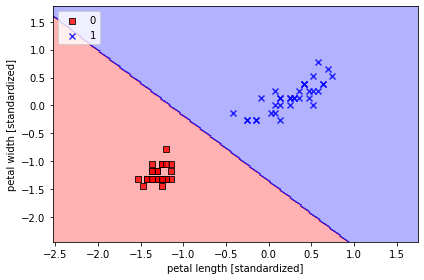

In [56]:
X_train_01_subset = X_train_sc[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=100,random_state=1)
lr.fit(X_train_sc,y_train)

LogisticRegression(C=100, random_state=1)

In [61]:
X_combined_std = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


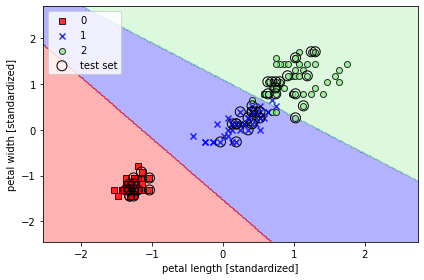

In [62]:
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

<h4>로지스틱이해 조건부 확률</h4> 

In [66]:
lr.predict_proba(X_test_sc[:3,:])# 각 클래스별 확률을 반환한다

array([[7.75503469e-14, 1.21970680e-04, 9.99878029e-01],
       [4.30949496e-09, 5.20209261e-02, 9.47979070e-01],
       [9.99046820e-01, 9.53179560e-04, 4.49336989e-14]])

<h4>로지스틱이해 규제</h4> 

In [68]:
Image(url='https://git.io/Jtm2V', width=700) 

규제:과대적합을 피하기 위해 사용 과대적합은 훈련데이터가 너무 훈련되어 테스트 적용시 
사용된 l2규제 람다/2||w||*2

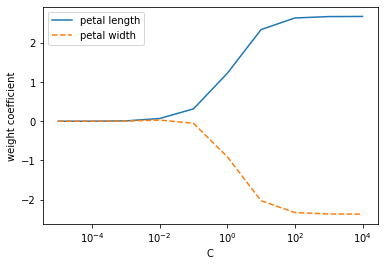

In [71]:
weights, params = [], []#r가중치와 파람 확인
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_sc, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights=np.array(weights)
plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
#c값이 낮을수록 규제가 심하고 c값이 높을수록 규제가 낮다

<h2>4.svm</h2>

<h3>서포트벡터 머신</h3>
서포트벡터 머신은 학습 알고리즘이다. svm은 마진을 최적화 하여 예측하는 모델입니다

In [73]:
Image(url='https://git.io/Jtm2r', width=700)

<h4>최대마진</h4>
최대마진을 원하는 이유는 과대적합을 방지하기 위해서입니다.
w0+w.t*xpos=1
w0+w.t*xneg=-1
1,2의 차이 2
2/||w||

<h4>슬랙</h4>
슬랙은 선형적으로 구분되지 않는 데이터에서 사용합니다 
1일때는 1-슬랙
-1일때는 -1+슬랙

In [75]:
Image(url='https://git.io/Jtm26', width=600) 

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


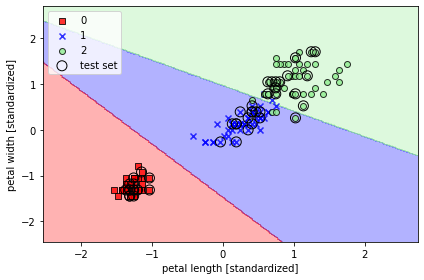

In [78]:
from sklearn.svm import SVC
svm=SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(X_train_sc,y_train)
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()

In [79]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')#로지스틱
svm = SGDClassifier(loss='hinge')#svm

<h4>커널</h4>
svm사용시 비선형 문제를 해결하기 위해 커널 기법사용

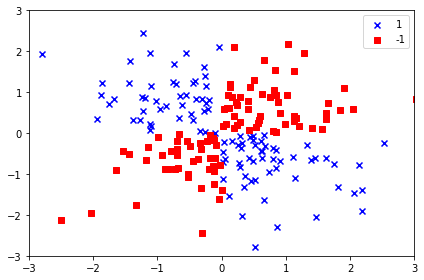

In [83]:
#예시
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()

In [84]:
Image(url='https://git.io/Jtm2X', width=700) 

<h4>커널기법</h4>
k(xi,xj)=(xi).t*(xj)
exp=||xi-xj/2a**2|=
-r||xi-xj||
커널은 샘플칸의 유사도 함수로 해석할수 있습니다

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


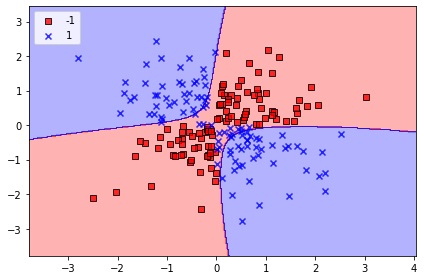

In [87]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.1,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


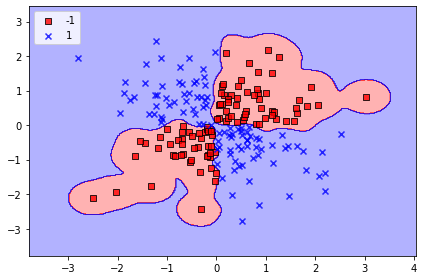

In [89]:
svm=SVC(kernel='rbf',random_state=0,gamma=10,C=10.0)
svm.fit(X_xor,y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()
#감마가 클수록 과대적합이 된다

<h2>결정계수</h2>

<h4>결정트리는 훈랸데이터에 있는 특성으로 샘플의 클래스 레이블을 추정할 수 있는 레이블을 추정하는 학습</h4>
결정 알고리즘은 정보이득이 최대가 되는 특성으로 데이터 분리
i는 불순도 지표입니다. 자식의 불순도가 낮을수록 정보이득이 커집니다.
불순도 지표의 종류는 엔트로피,지니불순도,분류오차가 있습니다.

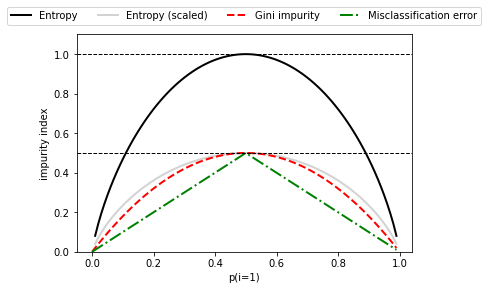

In [92]:
import matplotlib.pyplot as plt
import numpy as np
def gini(p):
    return p*(1-p)+(1-p)*(1-(1-p))
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))
def error(p):
    return 1-np.max([p,1-p])
x=np.arange(0.0,1.0,0.01)
ent=[entropy(p) if p != 0 else None for p in x]
sc_ent=[e*0.5 if e else None for e in ent]
err=[error(i) for i  in x]

ig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], 
                          ['Entropy', 'Entropy (scaled)', 
                           'Gini impurity', 'Misclassification error'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('impurity index')
# plt.savefig('images/03_19.png', dpi=300, bbox_inches='tight')
plt.show()

<h4>랜덤포레스트</h4>
랜덤포레스트는 배깅과 부스팅을 포함한 앙상블의 종류의 하나로써 결정트리의 일반화 성능 증가하고 과대적합 위험 줄입니다
장점은:튜닝에 노력 필요 없음 단점:해석이 쉽지 않다

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


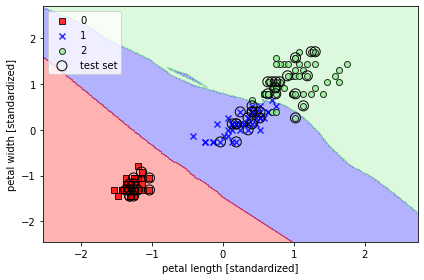

In [103]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train,y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()

<h2>이웃접</h2>

이웃점은 근처의 샘플을 통해 클래스를 예측합니다
1.숫자k와 거리기준 선택 
2.분류하려는 샘플에서 k개의 이웃점 찾는다
3.다수결 투표를 통해 클래스 레이블 할당합니다

C:\Users\예지\AppData\Local\Temp/ipykernel_14820/4072683638.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


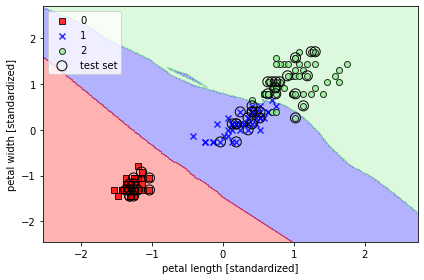

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,p=2,metric='minkowski')#맨해튼 혹은 유클라디언 거리 2면 유클라디안 1이면 맨해튼
knn.fit(X_train_sc,y_train)
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_24.png', dpi=300)
plt.show()